<a href="https://colab.research.google.com/github/aaart45/Fraud_Capstone/blob/main/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing & verify libraries

In [1]:
!pip -q install pandas numpy scikit-learn joblib matplotlib


In [2]:
import pandas as pd, numpy as np, sklearn, joblib, matplotlib

In [3]:
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("sklearn:", sklearn.__version__)
print("joblib:", joblib.__version__)
print("matplotlib:", matplotlib.__version__)

pandas: 2.2.2
numpy: 2.0.2
sklearn: 1.6.1
joblib: 1.5.2
matplotlib: 3.10.0


Uploading and loading Dataset

In [8]:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
    import pandas as pd

    # For a CSV file
    df = pd.read_csv('/content/drive/My Drive/creditcard.csv')

    # For an Excel file
    # df = pd.read_excel('/content/drive/My Drive/your_folder/your_dataset.xlsx')

    print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

Sanity checks (columns + class balance)

In [12]:
required = ['Time'] + [f'V{i}' for i in range(1,29)] + ['Amount','Class']
missing = set(required) - set(df.columns)
print("Missing columns:", missing)

print("Rows x Cols:", df.shape)
print("Class counts:\n", df['Class'].value_counts().to_frame('count'))
print("Fraud ratio (%):", round(df['Class'].mean()*100, 4))


Missing columns: set()
Rows x Cols: (284807, 31)
Class counts:
         count
Class        
0      284315
1         492
Fraud ratio (%): 0.1727


Quick data health check

In [14]:
import numpy as np, pandas as pd

print("Rows, Cols:", df.shape)
print("\nColumn dtypes:")
print(df.dtypes.head(10))

print("\nNulls per column (should be 0 for this dataset):")
print(df.isna().sum().sort_values(ascending=False).head(10))

dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

print("\nDescribe (Amount & Time):")
print(df[['Amount','Time']].describe())


Rows, Cols: (284807, 31)

Column dtypes:
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
dtype: object

Nulls per column (should be 0 for this dataset):
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

Duplicate rows: 1081

Describe (Amount & Time):
              Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000


Let's check how many fraud vs normal transactions.

Class counts:
         count
Class        
0      284315
1         492
Fraud ratio: 0.1727%


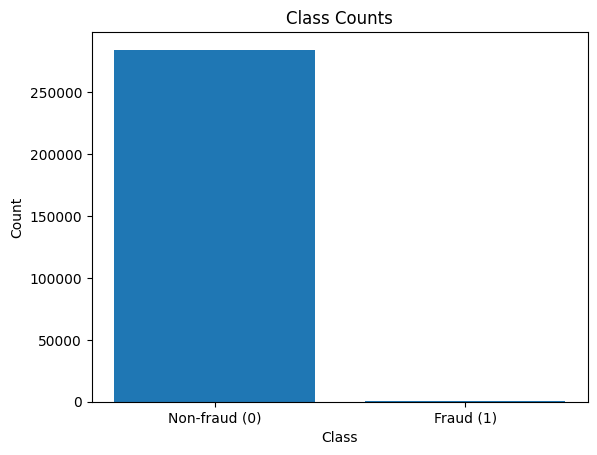

In [15]:
counts = df['Class'].value_counts().sort_index()  # 0 then 1
total = int(counts.sum())
fraud = int(counts.get(1, 0))
ratio = 100 * fraud / total

print("Class counts:\n", counts.to_frame('count'))
print(f"Fraud ratio: {ratio:.4f}%")

# simple bar chart
import matplotlib.pyplot as plt
plt.figure()
plt.bar(['Non-fraud (0)', 'Fraud (1)'], [counts.get(0,0), counts.get(1,0)])
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Expected: fraud ≈ 0.17% (very imbalanced). Bar chart shows huge difference.

EDA

Quick data health check

In [16]:
import numpy as np, pandas as pd

print("Rows, Cols:", df.shape)
print("\nColumn dtypes:")
print(df.dtypes.head(10))

print("\nNulls per column (should be 0 for this dataset):")
print(df.isna().sum().sort_values(ascending=False).head(10))

dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

print("\nDescribe (Amount & Time):")
print(df[['Amount','Time']].describe())


Rows, Cols: (284807, 31)

Column dtypes:
Time    float64
V1      float64
V2      float64
V3      float64
V4      float64
V5      float64
V6      float64
V7      float64
V8      float64
V9      float64
dtype: object

Nulls per column (should be 0 for this dataset):
Time    0
V1      0
V2      0
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
dtype: int64

Duplicate rows: 1081

Describe (Amount & Time):
              Amount           Time
count  284807.000000  284807.000000
mean       88.349619   94813.859575
std       250.120109   47488.145955
min         0.000000       0.000000
25%         5.600000   54201.500000
50%        22.000000   84692.000000
75%        77.165000  139320.500000
max     25691.160000  172792.000000


Class imbalance (how many fraud vs normal)

Class counts:
         count
Class        
0      284315
1         492
Fraud ratio: 0.1727%


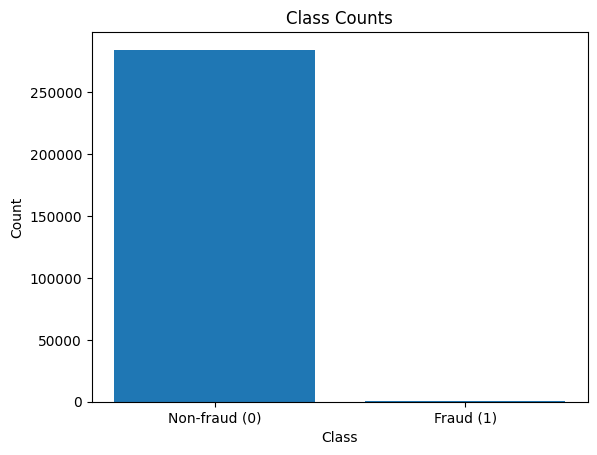

In [17]:
counts = df['Class'].value_counts().sort_index()  # 0 then 1
total = int(counts.sum())
fraud = int(counts.get(1, 0))
ratio = 100 * fraud / total

print("Class counts:\n", counts.to_frame('count'))
print(f"Fraud ratio: {ratio:.4f}%")

# simple bar chart
import matplotlib.pyplot as plt
plt.figure()
plt.bar(['Non-fraud (0)', 'Fraud (1)'], [counts.get(0,0), counts.get(1,0)])
plt.title('Class Counts')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Distributions that often matter (Amount & Time)

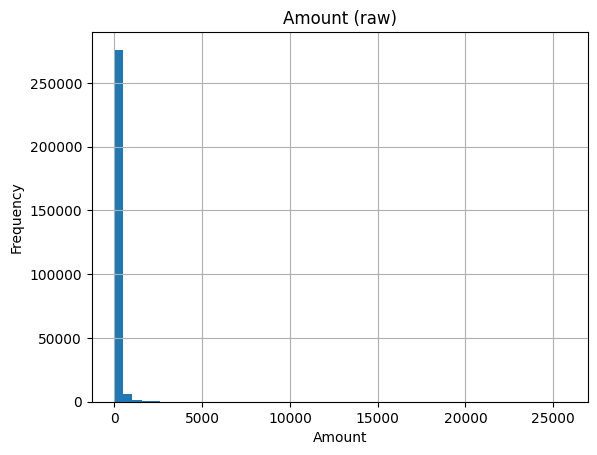

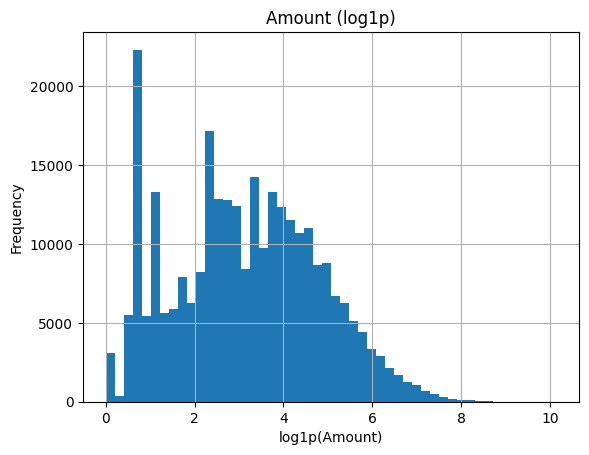

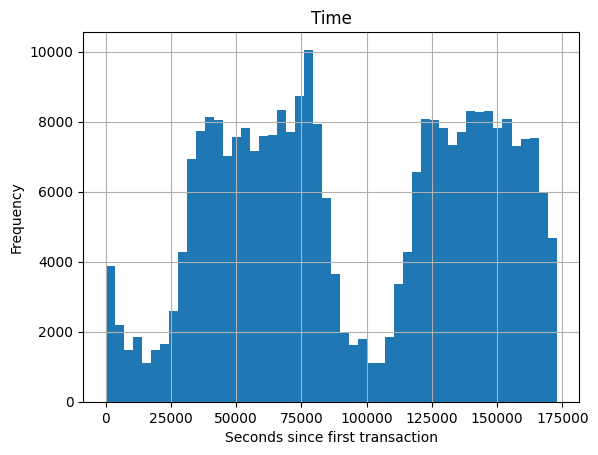

In [18]:
import matplotlib.pyplot as plt
figs = []

# Amount histogram (raw)
plt.figure()
df['Amount'].hist(bins=50)
plt.title('Amount (raw)')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Amount (log1p) to see small values better
plt.figure()
np.log1p(df['Amount']).hist(bins=50)
plt.title('Amount (log1p)')
plt.xlabel('log1p(Amount)')
plt.ylabel('Frequency')
plt.show()

# Time histogram (seconds from first transaction)
plt.figure()
df['Time'].hist(bins=50)
plt.title('Time')
plt.xlabel('Seconds since first transaction')
plt.ylabel('Frequency')
plt.show()


Amount has many small values; log1p shows a smoother spread.

Time shows activity patterns across the day(s)

Lets see feature sanity & basic correlations

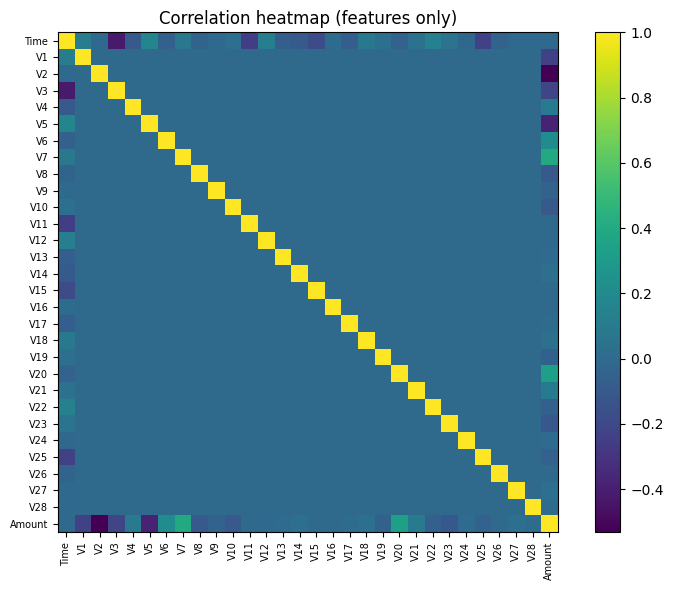

Top 10 |corr(feature, Class)|
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64


In [19]:
# correlation matrix among numeric features (quick heatmap)
num_cols = ['Time'] + [f'V{i}' for i in range(1,29)] + ['Amount']
corr = df[num_cols].corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.colorbar()
plt.title('Correlation heatmap (features only)')
plt.xticks(range(len(num_cols)), num_cols, rotation=90, fontsize=7)
plt.yticks(range(len(num_cols)), num_cols, fontsize=7)
plt.tight_layout()
plt.show()

# correlation of each feature with Class (binary 0/1)
feat_with_class = df[num_cols].join(df['Class'])
corr_with_y = feat_with_class.corr()['Class'].drop('Class').sort_values(key=np.abs, ascending=False)
print("Top 10 |corr(feature, Class)|")
print(corr_with_y.head(10))


Heatmap renders (no errors).

A few features show higher absolute correlation with Class than others (values are typically small but informative).

Simple data quality checks (rules)

In [20]:
problems = {}

# 1. negative or NaN amounts (should not exist)
bad_amount = df[(df['Amount'] < 0) | (df['Amount'].isna())]
problems['bad_amount_rows'] = len(bad_amount)

# 2. non-finite values anywhere
non_finite = ~np.isfinite(df[['Time'] + [f'V{i}' for i in range(1,29)] + ['Amount']]).all(axis=1)
problems['non_finite_rows'] = int(non_finite.sum())

# 3. duplicates (not always harmful, but we record)
problems['duplicate_rows'] = int(df.duplicated().sum())

# 4. missing values (should be 0)
problems['missing_values_total'] = int(df.isna().sum().sum())

problems


{'bad_amount_rows': 0,
 'non_finite_rows': 0,
 'duplicate_rows': 1081,
 'missing_values_total': 0}

It is always a good idea to save history so lets save EDA summary

In [21]:
eda_summary = {
    "shape": tuple(df.shape),
    "class_counts": df['Class'].value_counts().to_dict(),
    "fraud_ratio_percent": round(df['Class'].mean()*100, 5),
    "problems": problems
}
eda_summary


{'shape': (284807, 31),
 'class_counts': {0: 284315, 1: 492},
 'fraud_ratio_percent': np.float64(0.17275),
 'problems': {'bad_amount_rows': 0,
  'non_finite_rows': 0,
  'duplicate_rows': 1081,
  'missing_values_total': 0}}